In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
%cd drive/MyDrive/recommender_system/


/content/drive/MyDrive/recommender_system


In [ ]:
import sys, os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


sys.path.append('/content/drive/MyDrive/recommender_system/src')


In [ ]:
from data_structure import create_data_structure

filename = "data/ml-32m/ratings.csv"

(userid_to_idx, idx_to_userid, movieid_to_idx,
          idx_to_movieid,data_by_user, data_by_movie) = create_data_structure(filename)

In [ ]:
print(f"The length of the data_by_user: {len(data_by_user)}")
print(f"lenght userid_to_idx          : {len(userid_to_idx)}")
print(f"length idx_to_userid          : {len(idx_to_userid)}")

The length of the data_by_user: 200948
lenght userid_to_idx          : 200948
length idx_to_userid          : 200948


In [ ]:
print(f"The length of the data_by_movie: {len(data_by_movie)}")
print(f"lenght movieid_to_idx          : {len(movieid_to_idx)}")
print(f"length idx_to_movieid          : {len(idx_to_movieid)}")

The length of the data_by_movie: 84432
lenght movieid_to_idx          : 84432
length idx_to_movieid          : 84432


In [ ]:
# Let's see the first ten elements in userid 1
print(f"The first elements in userid 1")
for i in range(10):
    print(data_by_user[0][i])

The first elements in userid 1
(0, 4.0)
(1, 1.0)
(2, 2.0)
(3, 5.0)
(4, 5.0)
(5, 2.0)
(6, 1.0)
(7, 5.0)
(8, 3.0)
(9, 5.0)


In [ ]:
print(f"first data for User at index 12: {data_by_user[12][0]}")

first data for User at index 12: (943, 5.0)


In [ ]:
# Test for data_by_movie
if (12,5.0) in data_by_movie[943]:
  print("It is exactly in it")
else:
  print("there is an error of index")

It is exactly in it


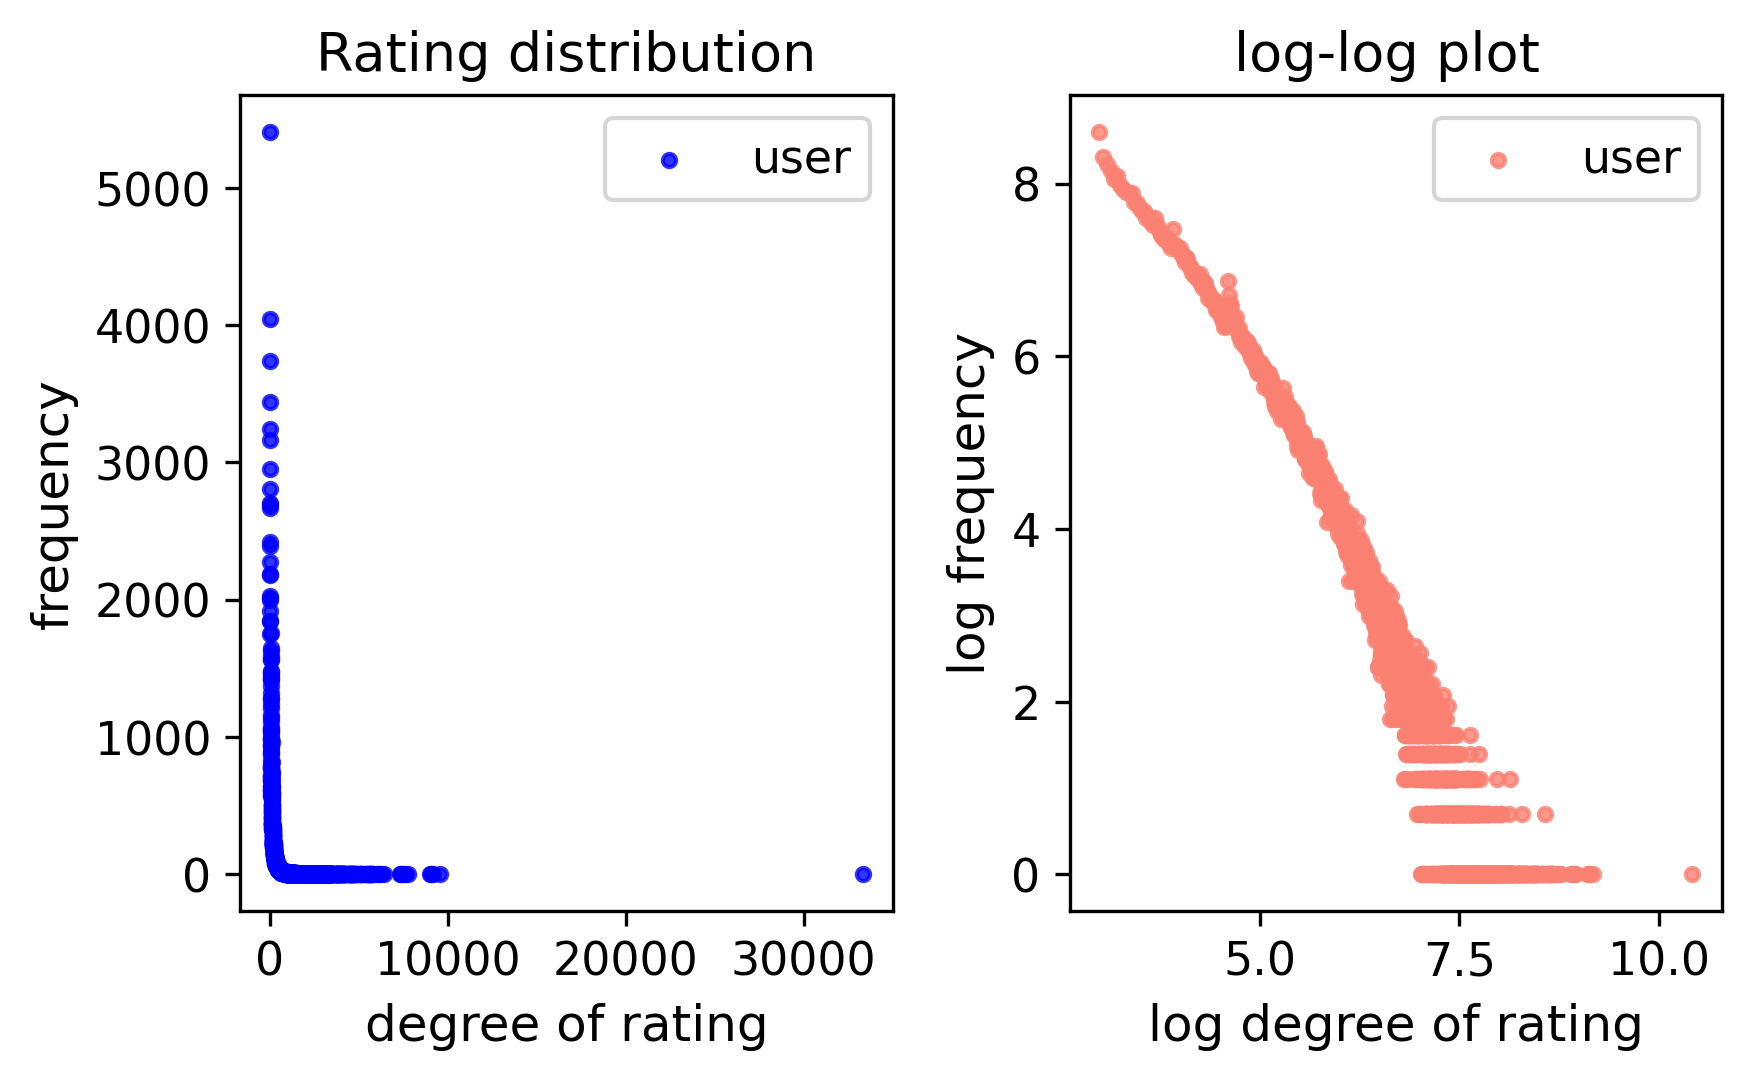

In [ ]:
user_degree = np.array([len(data_by_user[i]) for i in range(len(data_by_user))])
degree_user, freq_deg_user = np.unique(user_degree, return_counts=True)
log_degree_user = np.log(degree_user)
log_freq_deg_user = np.log(freq_deg_user)

fig, axes = plt.subplots(1, 2,)

axes[0].scatter(degree_user,freq_deg_user,
            color='blue',
            s=10,
            alpha=0.8, label="user")
axes[0].set_xlabel("degree of rating")
axes[0].set_ylabel("frequency")
axes[0].set_title("Rating distribution")
axes[0].legend()

axes[1].scatter(log_degree_user, log_freq_deg_user, color="salmon",s=10, alpha=0.8, label="user")
axes[1].set_xlabel("log degree of rating")
axes[1].set_ylabel("log frequency")
axes[1].set_title("log-log plot ")
axes[1].legend()



plt.tight_layout(rect=[0, 0, 1, 0.95])

# path = "figure_saved"
# name_file = f"rating_distribution_and_log_plot_user.pdf"

# os.makedirs(path, exist_ok=True)

# plt.savefig(os.path.join(path, name_file), format='pdf',bbox_inches="tight")

plt.show()

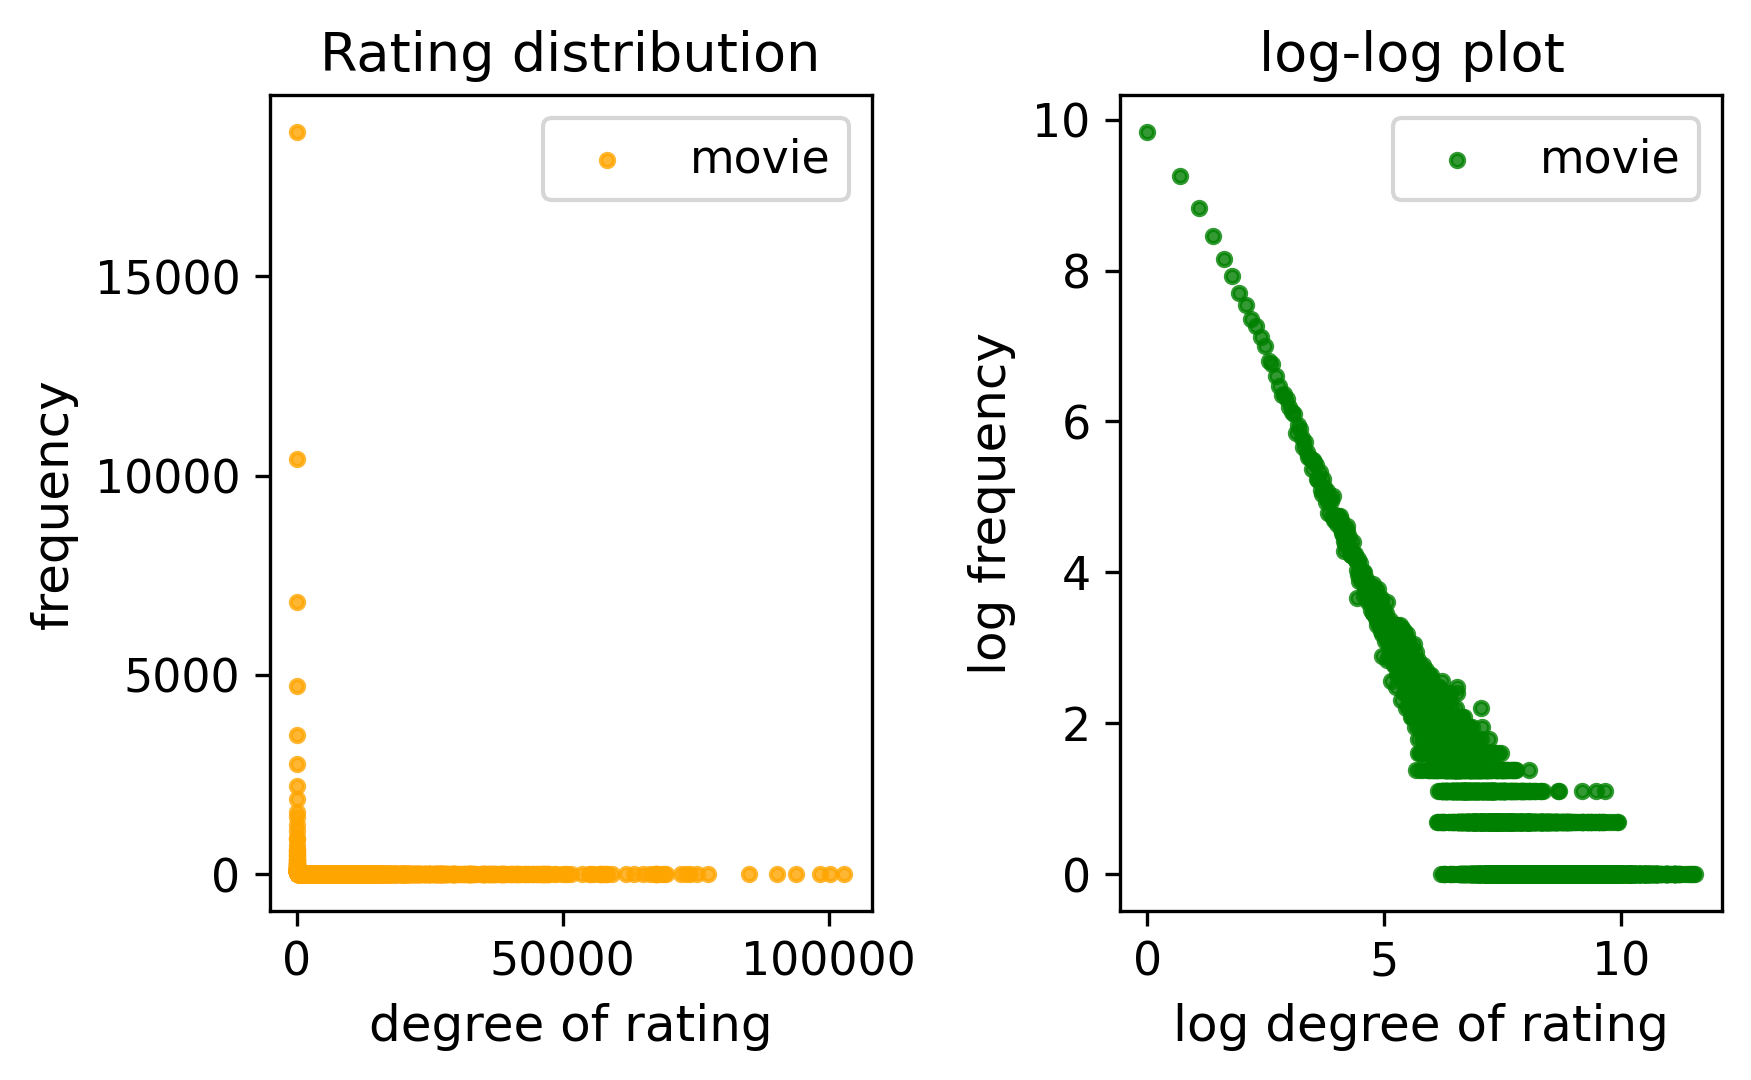

In [ ]:
movie_degree = [len(data_by_movie[i]) for i in range(len(data_by_movie))]
movie_degree = np.array(movie_degree)
degree_mov, freq_deg_mov = np.unique(movie_degree, return_counts=True)
log_degree_mov = np.log(degree_mov)
log_freq_deg_mov = np.log(freq_deg_mov)

fig, axes = plt.subplots(1, 2)
axes[0].scatter(degree_mov,freq_deg_mov,
            color='orange',
            s=10,
            alpha=0.8, label="movie")
axes[0].set_xlabel("degree of rating")
axes[0].set_ylabel("frequency")
axes[0].set_title("Rating distribution")
axes[0].legend()

axes[1].scatter(log_degree_mov, log_freq_deg_mov, color="green",s=10, alpha=0.8, label="movie")
axes[1].set_xlabel("log degree of rating")
axes[1].set_ylabel("log frequency")
axes[1].set_title("log-log plot ")
axes[1].legend()



plt.tight_layout(rect=[0, 0, 1, 0.95])

path = "figure_saved"
name_file = f"rating_distribution_and_log_plot_movie.pdf"

os.makedirs(path, exist_ok=True)

plt.savefig(os.path.join(path, name_file), format='pdf',bbox_inches="tight")

plt.show()